# Class Central Survey: compare target group 'Latin America' with the rest of the sample

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

## Read the survey data

In [2]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

## Create target group 'Latin America'

In [3]:
df['Which region of the world are you in?'].value_counts()

United States                 818
Western Europe (except UK)    287
Africa                        276
India                         219
East & Southeast Asia         200
Eastern Europe                153
Central or South America      147
Canada                        104
United Kingdom                 98
Australia / New Zealand        92
Mexico                         47
Name: Which region of the world are you in?, dtype: int64

In [4]:
target_name = 'Latin America'
mask_latin_america = (df['Which region of the world are you in?'] == 'Central or South America') | \
    (df['Which region of the world are you in?'] =='Mexico')

## Generic function to plot barchart for any categorical feature on any target/nontarget split 

In [5]:
def binary_compare_categorical_barh(mask, feature, df=df,
                                            target_name='target', nontarget_name='Other', 
                                            split_name='visitor', answer='answer'):
    """Split dataframe into two based on mask
    Draw horizontal barcharts for each category item for both masked and unmasked object"""
    target = df[mask]
    nontarget = df[~mask]
    target_size, nontarget_size = len(target), len(nontarget)
    
    res_target = target[feature].value_counts()/target_size*100
    res_nontarget = nontarget[feature].value_counts()/nontarget_size*100
    
    result = pd.DataFrame({target_name: res_target, nontarget_name: res_nontarget})
    result[answer] = result.index
    
    res_df = pd.melt(result, id_vars=answer, var_name=split_name, value_name='percentage')
    print(res_df)
    
    sns.factorplot(x='percentage', y=answer, hue=split_name, data=res_df, kind='bar', orient='h', size=6, aspect=2)
    plt.title(feature)
    sns.despine(left=True, bottom=True)
    plt.show()
    return

## Generic function to plot barchart for any multi-categorical feature on any target/nontarget split

In [6]:
def binary_compare_multi_select_categorical_barh(df, target, target_name, question, selectors, nontarget_name = 'Others'):
    """draw a barchart for Survey results on a question that allows to select multiple categories
    df: dataframe to use
    target: selection of rows based on column values
    question: the question you want to analyse
    selectors: list of df column containing the selectors (values 0/1)"""
    size = {}
    target_df = df[target]
    nontarget_df = df[~target]
    size[target_name], size[nontarget_name] = len(target_df), len(nontarget_df)
    print(size)
    graph_targetdata = target_df.loc[:, selectors]
    graph_targetdata['target'] = target_name
    
    graph_nontargetdata = nontarget_df.loc[:, selectors]
    graph_nontargetdata['target'] = nontarget_name
    
    graph_data = pd.concat([graph_targetdata, graph_nontargetdata])
    
    melted = pd.melt(graph_data, id_vars='target', var_name='select', value_name='percentage')
    grouped = melted.groupby(['target', 'select'], as_index=False).sum()
    #print(size[grouped['target']])
    grouped.percentage = grouped.percentage/grouped['target'].map(size)*100 # make it percentage of total
    grouped['select'] = grouped['select'].apply(lambda x: x.split(": ")[1]) # remove prefix from string
    print(grouped)  
    
    sns.factorplot(x='percentage', y='select', hue='target', data=grouped, kind='bar', orient='h', size=6, aspect=2)
    sns.plt.title(question)
    sns.despine(left=True, bottom=True)
    sns.plt.show()

## Apply this plot on the target 'Latin America' for some categorical features

   answer        visitor  percentage
0     1.0  Latin America   13.402062
1     2.0  Latin America    7.216495
2     3.0  Latin America   13.917526
3     4.0  Latin America   26.288660
4     5.0  Latin America   39.175258
5     1.0          Other   21.680453
6     2.0          Other    9.751850
7     3.0          Other   14.497170
8     4.0          Other   22.115803
9     5.0          Other   30.953418


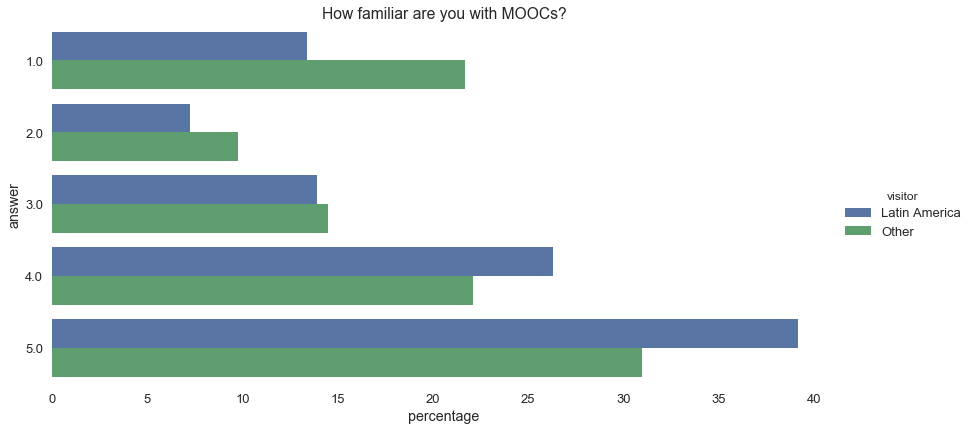

In [7]:
binary_compare_categorical_barh(mask=mask_latin_america, 
            target_name='Latin America', feature='How familiar are you with MOOCs?')

Latin american visitors are more familiar with MOOCs than other visitors of Class Central

   answer        visitor  percentage
0     1.0  Latin America   13.402062
1     2.0  Latin America   11.340206
2     3.0  Latin America   19.072165
3     4.0  Latin America   21.649485
4     5.0  Latin America   34.020619
5     1.0          Other   18.023509
6     2.0          Other   11.885067
7     3.0          Other   21.070962
8     4.0          Other   20.156726
9     5.0          Other   27.731824


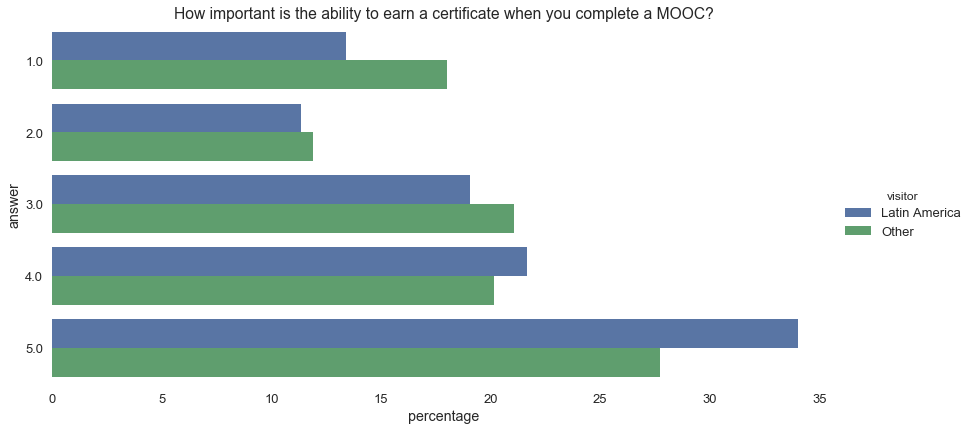

In [8]:
binary_compare_categorical_barh(mask=mask_latin_america, 
                                        target_name='Latin America', feature='How important is the ability to earn a certificate when you complete a MOOC?')

Latin American visitors find it more important than other visitors of Class Central

{'Latin America': 194, 'Others': 2297}
          target                              select  percentage
0  Latin America       Access to reference materials   40.206186
1  Latin America  Learning skills for current career   65.463918
2  Latin America      Learning skills for new career   42.783505
3  Latin America                   Personal interest   84.020619
4  Latin America                       School credit    9.278351
5         Others       Access to reference materials   26.948193
6         Others  Learning skills for current career   49.847627
7         Others      Learning skills for new career   48.498041
8         Others                   Personal interest   78.841968
9         Others                       School credit    8.576404


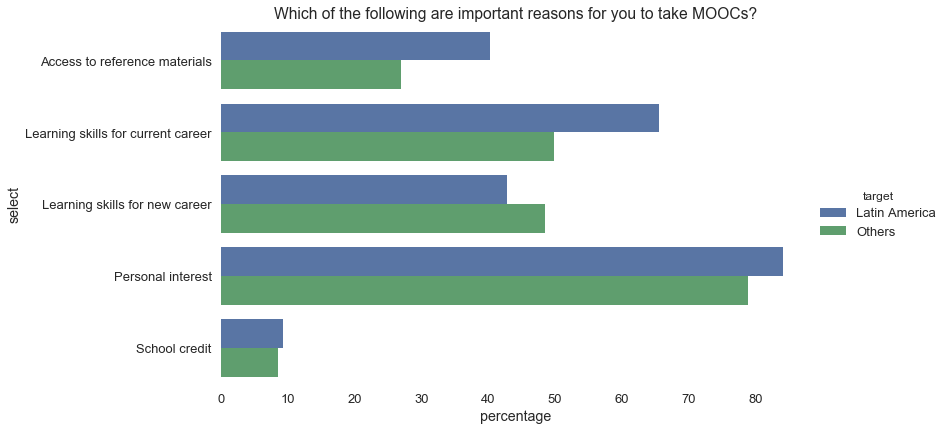

In [9]:
reasons = ['Reasons: Learning skills for current career', 'Reasons: Learning skills for new career', 
           'Reasons: School credit', 'Reasons: Personal interest', 'Reasons: Access to reference materials']
binary_compare_multi_select_categorical_barh(df, target=mask_latin_america, target_name='Latin America',
                question='Which of the following are important reasons for you to take MOOCs?', 
                selectors=reasons)

Latin Americans indicate more reasons than others to follow MOOCs, personal interest and learning skills for current career being the most important

{'Latin America': 194, 'Others': 2297}
           target                  select  percentage
0   Latin America  Institution/university   53.092784
1   Latin America              Instructor   10.824742
2   Latin America  Others recommendations   28.865979
3   Latin America                Platform   29.381443
4   Latin America                 Ratings   38.659794
5   Latin America           Topic/Subject   92.783505
6          Others  Institution/university   40.269917
7          Others              Instructor   16.499782
8          Others  Others recommendations   24.945581
9          Others                Platform   26.991728
10         Others                 Ratings   32.346539
11         Others           Topic/Subject   90.944710


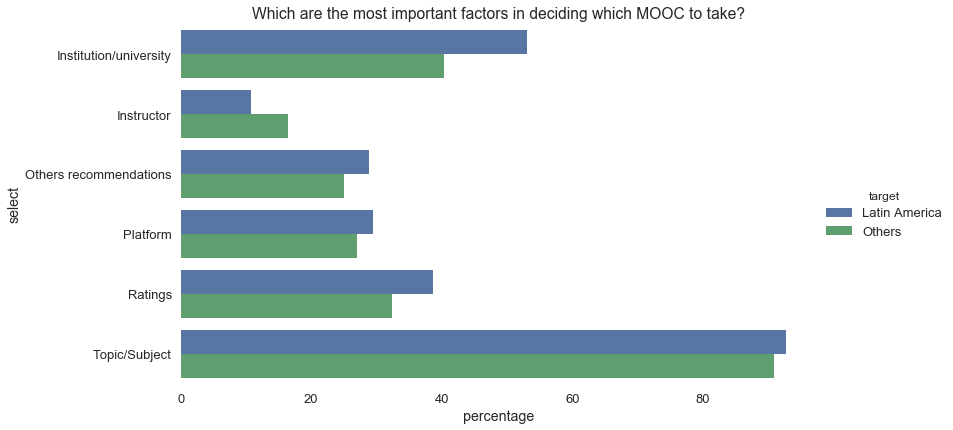

In [10]:
decisions = ['Decide: Topic/Subject', 'Decide: Instructor', 'Decide: Institution/university', 
             'Decide: Platform', 'Decide: Ratings', 'Decide: Others recommendations']
binary_compare_multi_select_categorical_barh(df, target=mask_latin_america, target_name='Latin America',
                question='Which are the most important factors in deciding which MOOC to take?', 
                selectors=decisions)

The topic/subject and the Institution are the most appealing reasons to follow a MOOC

{'Latin America': 194, 'Others': 2297}
          target                                             select  \
0  Latin America         Actively contributing to discussion forums   
1  Latin America                         Browsing discussion forums   
2  Latin America  Connecting with learners outside the course en...   
3  Latin America  Connecting with other learners in the course e...   
4  Latin America  Taking the course with other people you know (...   
5         Others         Actively contributing to discussion forums   
6         Others                         Browsing discussion forums   
7         Others  Connecting with learners outside the course en...   
8         Others  Connecting with other learners in the course e...   
9         Others  Taking the course with other people you know (...   

   percentage  
0   26.288660  
1   56.701031  
2   20.618557  
3   43.298969  
4   18.556701  
5   30.779277  
6   53.635176  
7   14.888986  
8   37.875490  
9   14.888986  


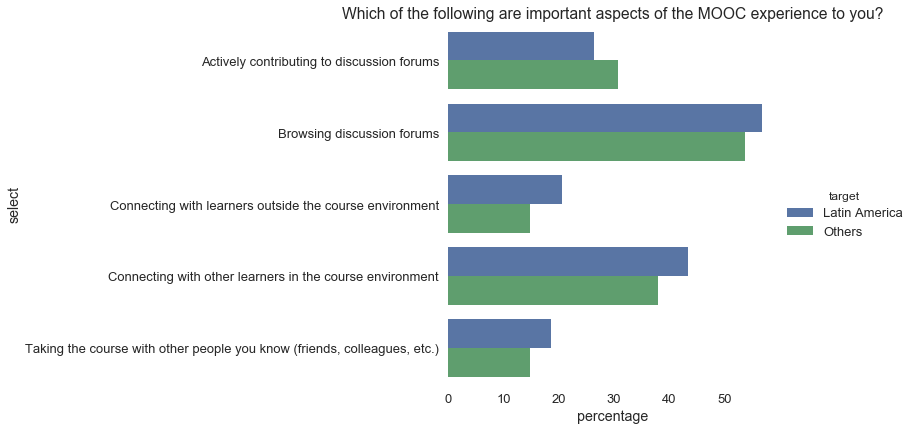

In [11]:
aspects = ['Aspects: Browsing discussion forums', 
           'Aspects: Actively contributing to discussion forums',
           'Aspects: Connecting with other learners in the course environment',
           'Aspects: Connecting with learners outside the course environment',
           'Aspects: Taking the course with other people you know (friends, colleagues, etc.)']
binary_compare_multi_select_categorical_barh(df, target=mask_latin_america, target_name='Latin America',
                question='Which of the following are important aspects of the MOOC experience to you?', 
                selectors=aspects)

Connecting with other students is more important for Latin American students than for others

{'Latin America': 194, 'Others': 2297}
           target                                        select  percentage
0   Latin America                          Have not taken MOOCs   12.886598
1   Latin America  Helped me get a new job in a different field    6.701031
2   Latin America     Helped me get a new job in the same field    5.154639
3   Latin America  Higher performance evaluation at current job   17.010309
4   Latin America                                    Not Really   41.237113
5   Latin America             Promotion at current organization    3.092784
6   Latin America                School credit towards a degree    2.061856
7          Others                          Have not taken MOOCs   16.369177
8          Others  Helped me get a new job in a different field    4.048759
9          Others     Helped me get a new job in the same field    4.875925
10         Others  Higher performance evaluation at current job   10.927296
11         Others                                

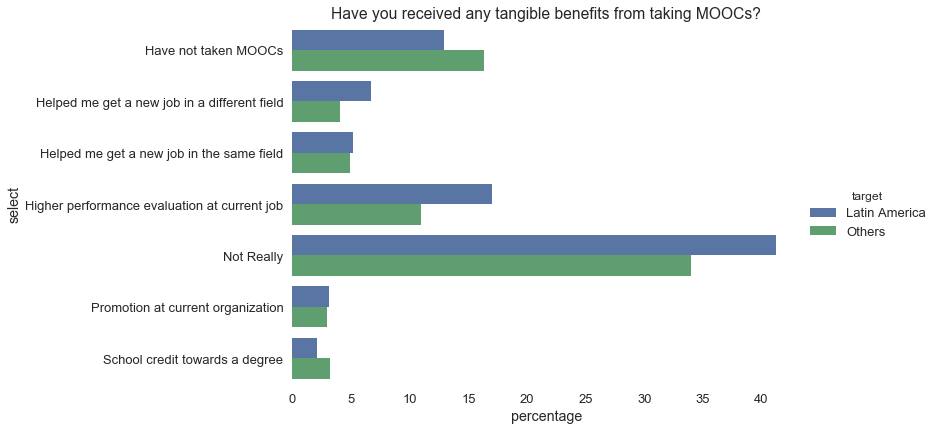

In [12]:
benefits = ['Benefit: Have not taken MOOCs', 
            'Benefit: Not Really',
            'Benefit: School credit towards a degree',
            'Benefit: Promotion at current organization',
            'Benefit: Higher performance evaluation at current job',
            'Benefit: Helped me get a new job in the same field',
            'Benefit: Helped me get a new job in a different field']
binary_compare_multi_select_categorical_barh(df, target=mask_latin_america, target_name='Latin America',
                question='Have you received any tangible benefits from taking MOOCs?', 
                selectors=benefits)

Higher performance evaluation at current job is perceived as benefit by 17% of the Latin American visitors

{'Latin America': 194, 'Others': 2297}
          target                                             select  \
0  Latin America  A multi-course certification that the MOOC is ...   
1  Latin America                       The MOOC platform being used   
2  Latin America       The institution/university offering the MOOC   
3  Latin America                           The instructor/professor   
4  Latin America                                  The topic/subject   
5         Others  A multi-course certification that the MOOC is ...   
6         Others                       The MOOC platform being used   
7         Others       The institution/university offering the MOOC   
8         Others                           The instructor/professor   
9         Others                                  The topic/subject   

   percentage  
0   32.989691  
1   10.824742  
2   53.608247  
3   12.886598  
4   51.546392  
5   23.857205  
6   10.666086  
7   38.659121  
8   14.105355  
9   46.103613  


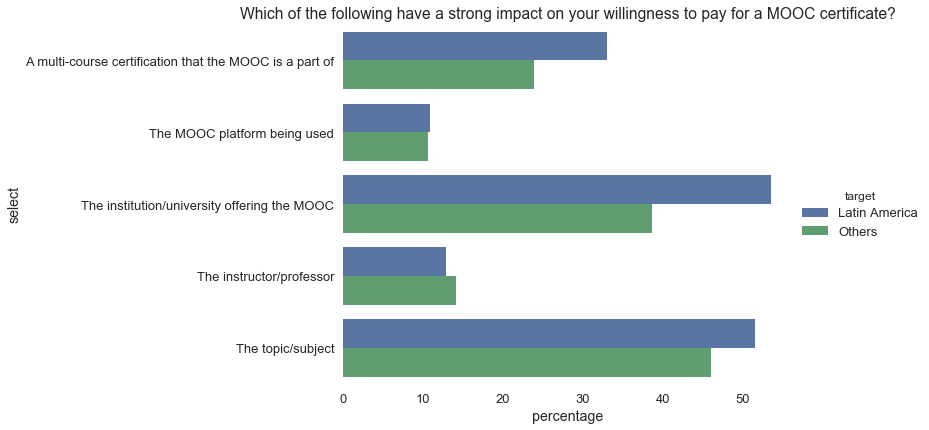

In [13]:
pays = ['Pay: The topic/subject',
        'Pay: The institution/university offering the MOOC',
        'Pay: The instructor/professor', 
        'Pay: The MOOC platform being used',
        'Pay: A multi-course certification that the MOOC is a part of']
binary_compare_multi_select_categorical_barh(df, target=mask_latin_america, target_name='Latin America',
                question='Which of the following have a strong impact on your willingness to pay for a MOOC certificate?', 
                selectors=pays)

The institution/university offering the MOOC is a very important argument for Latin Americans to take MOOCs

   answer        visitor  percentage
0       0  Latin America   20.103093
1       1  Latin America    8.247423
2      15  Latin America    6.701031
3     2.5  Latin America   14.432990
4      25  Latin America   10.824742
5     4.5  Latin America   15.979381
6       8  Latin America   22.164948
7       0          Other   27.383544
8       1          Other    9.795385
9      15          Other    9.664780
10    2.5          Other   15.977362
11     25          Other   10.361341
12    4.5          Other   12.189813
13      8          Other   12.494558


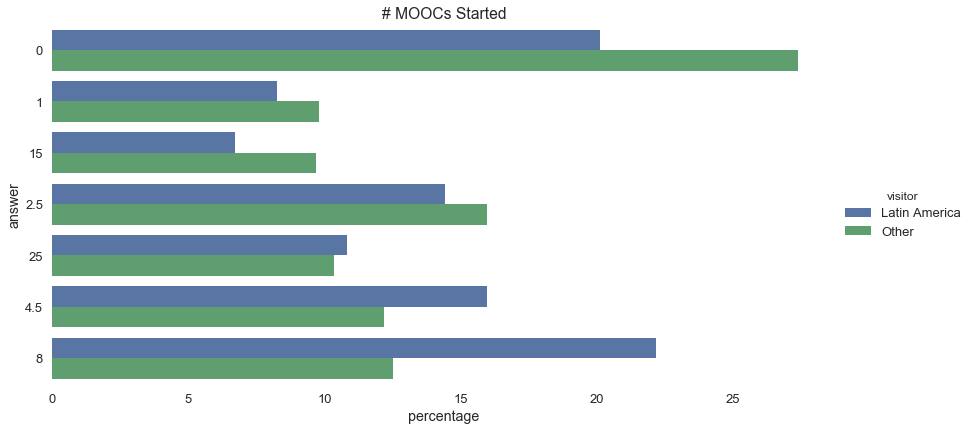

In [14]:
binary_compare_categorical_barh(mask=mask_latin_america, 
                                        target_name='Latin America', feature='# MOOCs Started')

38% of the Latin American visitors have started 4 or more MOOCs

   answer        visitor  percentage
0       0  Latin America   27.835052
1       1  Latin America    9.793814
2      15  Latin America    6.185567
3     2.5  Latin America   23.711340
4      25  Latin America    3.608247
5     4.5  Latin America   17.010309
6       8  Latin America    9.278351
7       0          Other   37.527209
8       1          Other   12.276883
9      15          Other    5.180670
10    2.5          Other   16.935133
11     25          Other    5.746626
12    4.5          Other   10.535481
13      8          Other    7.923378


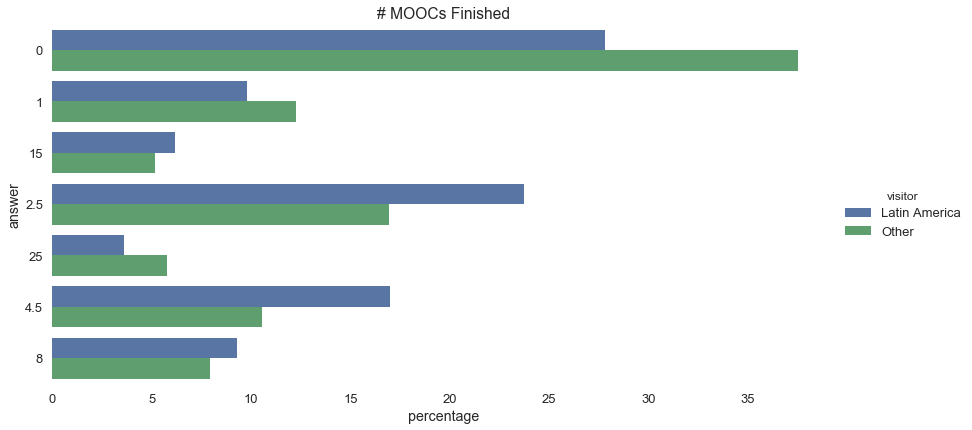

In [15]:
binary_compare_categorical_barh(mask=mask_latin_america, 
                                        target_name='Latin America', feature='# MOOCs Finished')

Latin American Class Central visitors are more experienced compared to the rest of the world, they have in general started and finished more MOOCs

                           answer        visitor  percentage
0                   1-2 years ago  Latin America   18.556701
1                    2+ years ago  Latin America   29.381443
2          6 months to 1 year ago  Latin America   10.309278
3  I have not taken any MOOCs yet  Latin America   21.134021
4            Within past 6 months  Latin America   19.587629
5                   1-2 years ago          Other   16.499782
6                    2+ years ago          Other   26.469308
7          6 months to 1 year ago          Other   10.317806
8  I have not taken any MOOCs yet          Other   30.779277
9            Within past 6 months          Other   15.280801


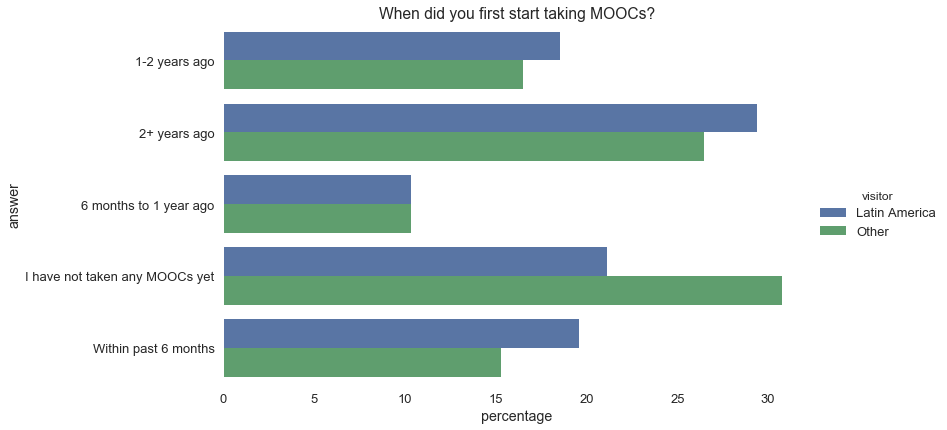

In [16]:
binary_compare_categorical_barh(mask=mask_latin_america, 
                                        target_name='Latin America', feature='When did you first start taking MOOCs?')

They also started earlier with MOOCs

                         answer        visitor  percentage
0                             1  Latin America   23.711340
1                             2  Latin America   19.587629
2                             3  Latin America   34.536082
3                             4  Latin America   12.886598
4                             5  Latin America    7.216495
5   Generally not that willing.  Latin America         NaN
6                             1          Other   27.296474
7                             2          Other   24.379626
8                             3          Other   26.208098
9                             4          Other   10.796691
10                            5          Other    8.271659
11  Generally not that willing.          Other    0.043535


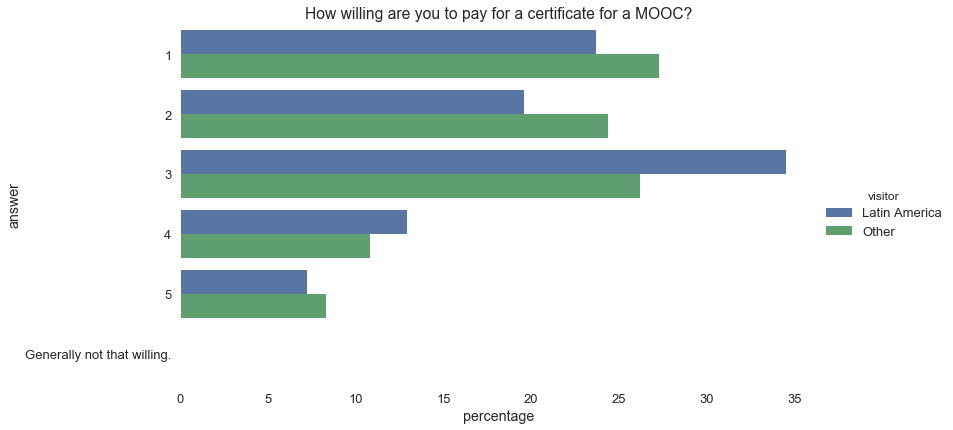

In [17]:
binary_compare_categorical_barh(mask=mask_latin_america, 
                                        target_name='Latin America', feature='How willing are you to pay for a certificate for a MOOC?')

Latin American Class Central visitor show a higher willingness to pay for a MOOC certificate

   answer        visitor  percentage
0     1.0  Latin America   12.371134
1     2.0  Latin America   16.494845
2     3.0  Latin America   35.567010
3     4.0  Latin America   20.618557
4     5.0  Latin America   11.340206
5     1.0          Other    9.534175
6     2.0          Other   19.721376
7     3.0          Other   37.788420
8     4.0          Other   16.935133
9     5.0          Other   11.144972


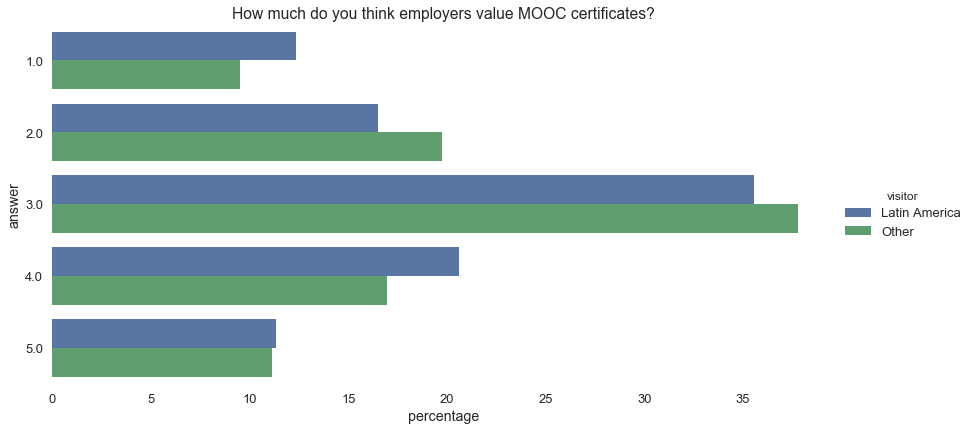

In [18]:
binary_compare_categorical_barh(mask=mask_latin_america, 
                                        target_name='Latin America', 
                                        feature='How much do you think employers value MOOC certificates?')

                              answer        visitor  percentage
0             Graduate school degree  Latin America   52.061856
1         3 or 4 year college degree  Latin America   24.742268
2                 High school degree  Latin America   12.886598
3              2-year college degree  Latin America    7.216495
4  Did not graduate from high school  Latin America    2.577320
5             Graduate school degree          Other   43.447976
6         3 or 4 year college degree          Other   29.124946
7                 High school degree          Other   14.279495
8              2-year college degree          Other    8.010448
9  Did not graduate from high school          Other    3.482804


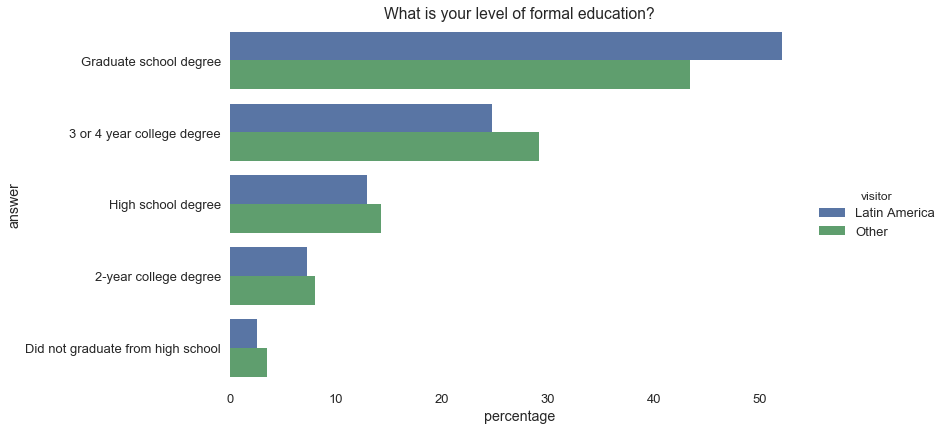

In [19]:
binary_compare_categorical_barh(mask=mask_latin_america, 
                                        target_name='Latin America', 
                                        feature='What is your level of formal education?')

More than half of LAtin American visitors have a graduate degree

             answer        visitor  percentage
0   10-17 years old  Latin America    2.577320
1   18-21 years old  Latin America    4.639175
2   22-25 years old  Latin America    8.762887
3   26-29 years old  Latin America    5.670103
4   30-35 years old  Latin America   14.948454
5   36-45 years old  Latin America   15.979381
6   46-55 years old  Latin America   24.226804
7   56-65 years old  Latin America   14.432990
8     66+ years old  Latin America    7.731959
9   10-17 years old          Other    2.002612
10  18-21 years old          Other    7.270353
11  22-25 years old          Other    8.097519
12  26-29 years old          Other    8.184589
13  30-35 years old          Other    9.751850
14  36-45 years old          Other   16.935133
15  46-55 years old          Other   18.633000
16  56-65 years old          Other   16.282107
17    66+ years old          Other   11.754462


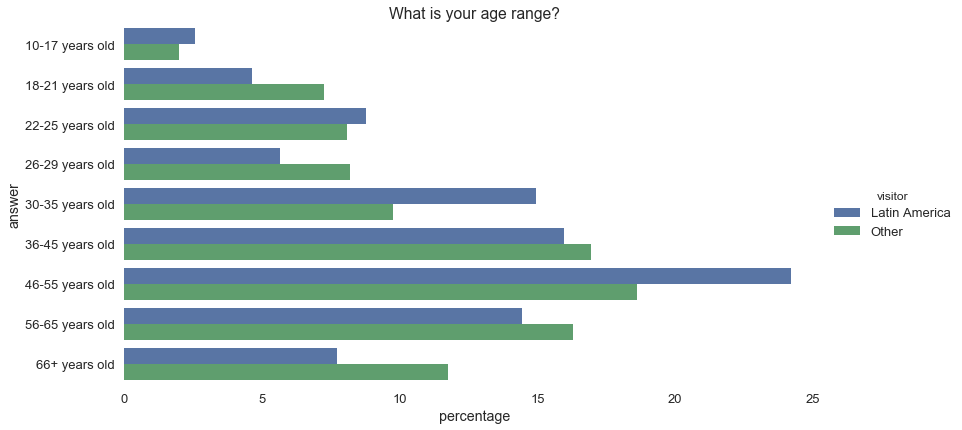

In [20]:
binary_compare_categorical_barh(mask=mask_latin_america, 
                                        target_name='Latin America', 
                                        feature='What is your age range?')